In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [279]:
# Importamos el fichero

df = pd.read_csv('bmw_pricing.csv')

df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


## **1. EDA INICIAL**
**********************************************************************************************************************************************************************************************

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [281]:
df.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [282]:
# Transformamos las columnas de fecha a datetime

for col in ['fecha_registro', 'fecha_venta']:

    df[col] = pd.to_datetime(df[col])

In [283]:
# Dividimos las columnas de fecha en sus respectivas columnas de day, month & year

for col in ['fecha_registro', 'fecha_venta']:

    df[col+'_day'] = df[col].dt.day
    df[col+'_dayname'] = df[col].dt.day_name()
    df[col+'_month'] = df[col].dt.month
    df[col+'_year'] = df[col].dt.year
    del df[col]

df

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,alerta_lim_velocidad,precio,fecha_registro_day,fecha_registro_dayname,fecha_registro_month,fecha_registro_year,fecha_venta_day,fecha_venta_dayname,fecha_venta_month,fecha_venta_year
0,NaN,118,140411.0,100.0,diesel,black,NaN,True,True,False,...,NaN,11300.0,1.0,Wednesday,2.0,2012.0,1.0,Monday,1.0,2018.0
1,BMW,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,...,True,69700.0,NaN,NaN,NaN,NaN,1.0,Thursday,2.0,2018.0
2,BMW,320,183297.0,120.0,diesel,white,NaN,False,False,False,...,False,10200.0,1.0,Sunday,4.0,2012.0,1.0,Thursday,2.0,2018.0
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,...,NaN,25100.0,NaN,NaN,NaN,NaN,1.0,Thursday,2.0,2018.0
4,BMW,425,97097.0,160.0,diesel,silver,NaN,True,True,False,...,True,33400.0,NaN,NaN,NaN,NaN,1.0,Sunday,4.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,diesel,black,NaN,False,True,False,...,False,14600.0,NaN,NaN,NaN,NaN,1.0,Wednesday,8.0,2018.0
4839,BMW,218 Active Tourer,49832.0,100.0,diesel,grey,NaN,False,True,False,...,True,17500.0,1.0,Monday,6.0,2015.0,1.0,Wednesday,8.0,2018.0
4840,BMW,218 Gran Tourer,19633.0,110.0,diesel,grey,van,False,True,False,...,True,17000.0,1.0,Thursday,10.0,2015.0,1.0,Saturday,9.0,2018.0
4841,BMW,218 Active Tourer,27920.0,110.0,diesel,brown,van,True,True,False,...,True,22700.0,1.0,Friday,4.0,2016.0,1.0,Saturday,9.0,2018.0


In [284]:
for col in df:
    print(col+' '+df[col].dtype.kind)

marca O
modelo O
km f
potencia f
tipo_gasolina O
color O
tipo_coche O
volante_regulable O
aire_acondicionado O
camara_trasera O
asientos_traseros_plegables O
elevalunas_electrico O
bluetooth O
gps b
alerta_lim_velocidad O
precio f
fecha_registro_day f
fecha_registro_dayname O
fecha_registro_month f
fecha_registro_year f
fecha_venta_day f
fecha_venta_dayname O
fecha_venta_month f
fecha_venta_year f


marca
BMW    3873
NaN     970
Name: count, dtype: int64

modelo
320                  752
520                  633
318                  568
X3                   438
116                  358
                    ... 
635                    1
M135                   1
 Active Tourer         1
225 Active Tourer      1
214 Gran Tourer        1
Name: count, Length: 77, dtype: int64

[[<Axes: title={'center': 'km'}>]]

[[<Axes: title={'center': 'potencia'}>]]

tipo_gasolina
diesel           4631
petrol            191
hybrid_petrol       8
NaN                 5
Diesel              5
electro             3
Name: count, dtype: int64

color
black     1499
grey      1070
blue       647
white      484
NaN        445
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

tipo_coche
NaN            1460
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
va

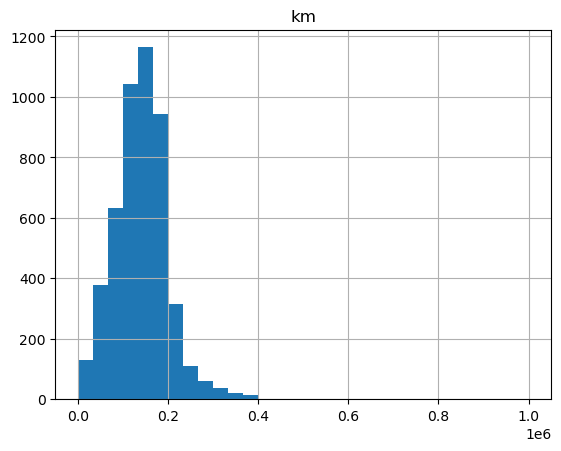

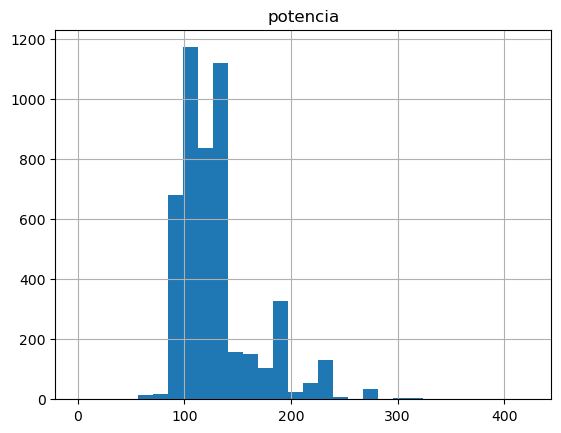

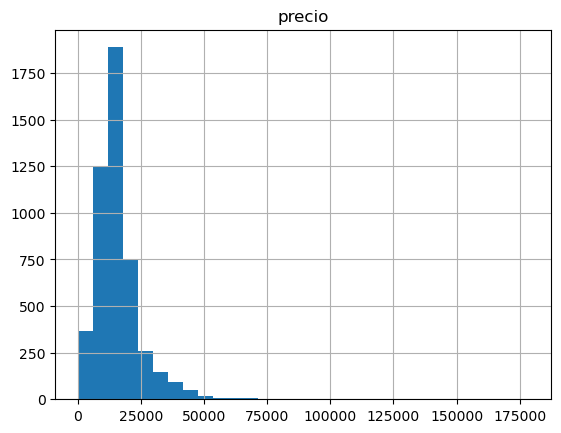

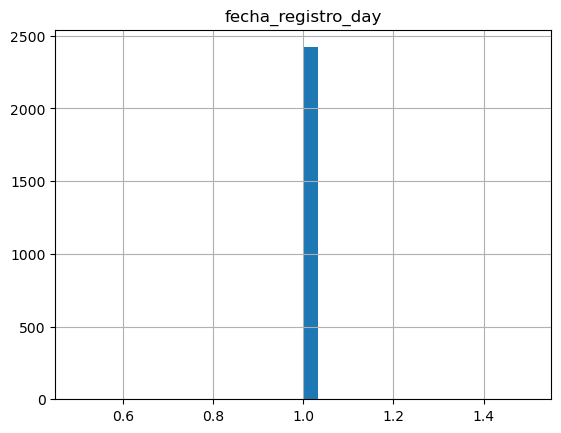

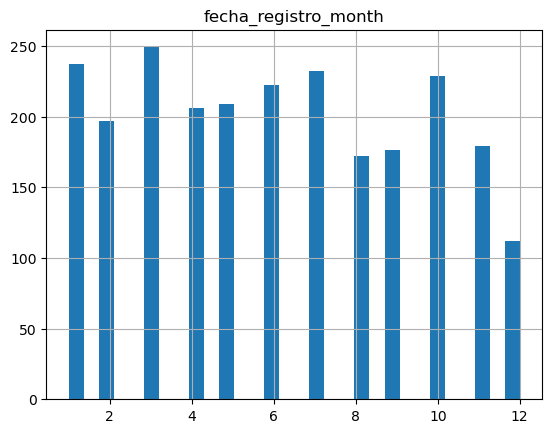

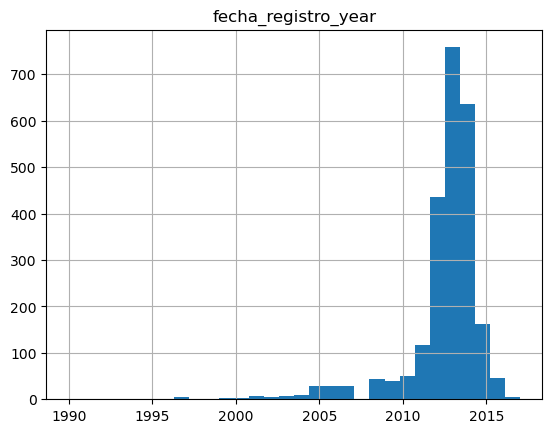

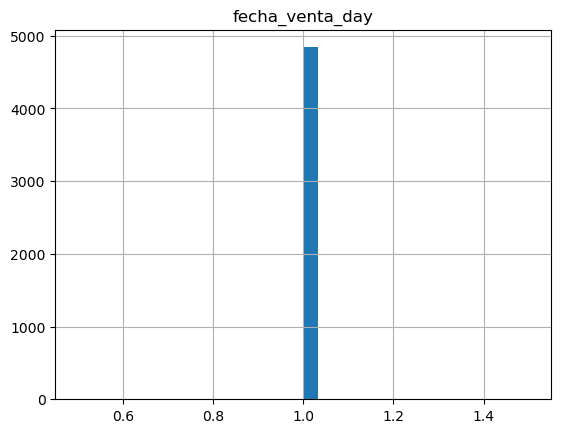

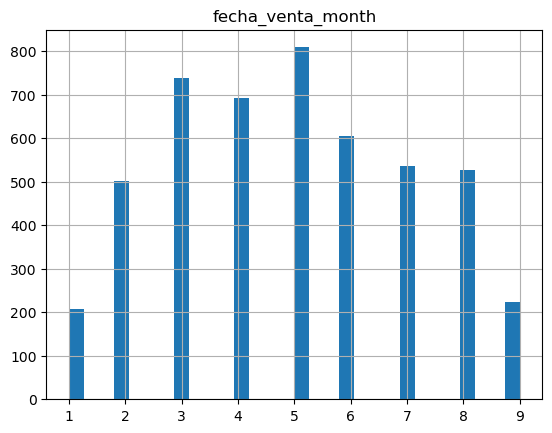

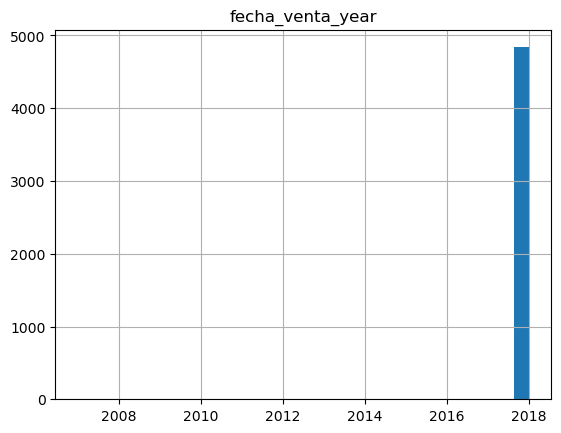

In [285]:
# Vistazo inicial de como se distribuyen nuestras variables

for col in df:

    if df[col].dtype.kind == 'O' or df[col].dtype.kind == 'b':

        print(df[col].value_counts(dropna=False))
        print()
    
    elif df[col].dtype.kind == 'f':

        print(df.hist(col, bins=30))
        print()        

In [286]:
# Observamos correlaciones lineales

corr = df.corr(numeric_only=True)

corr.style.background_gradient(cmap='coolwarm')

/opt/anaconda3/lib/python3.12/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/anaconda3/lib/python3.12/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,km,potencia,gps,precio,fecha_registro_day,fecha_registro_month,fecha_registro_year,fecha_venta_day,fecha_venta_month,fecha_venta_year
km,1.000000,-0.050141,0.154815,-0.410189,nan,-0.019104,-0.483464,nan,0.000164,-0.032405
potencia,-0.050141,1.000000,0.008862,0.639254,nan,0.009225,0.092517,nan,-0.028098,-0.001708
gps,0.154815,0.008862,1.000000,-0.005227,nan,-0.023102,-0.077771,nan,0.062770,-0.007710
precio,-0.410189,0.639254,-0.005227,1.000000,nan,-0.005090,0.427901,nan,0.012836,0.013929
fecha_registro_day,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fecha_registro_month,-0.019104,0.009225,-0.023102,-0.005090,nan,1.000000,-0.061033,nan,-0.034034,-0.050474
fecha_registro_year,-0.483464,0.092517,-0.077771,0.427901,nan,-0.061033,1.000000,nan,-0.055988,0.004537
fecha_venta_day,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fecha_venta_month,0.000164,-0.028098,0.062770,0.012836,nan,-0.034034,-0.055988,nan,1.000000,-0.010021
fecha_venta_year,-0.032405,-0.001708,-0.007710,0.013929,nan,-0.050474,0.004537,nan,-0.010021,1.000000


#### Algunas observaciones:

- Las siguientes columnas no aportan valor y han de ser eliminadas: marca, fecha_registro_day, fecha_venta_day

- Calcular la edad del vehiculo podria ser de mucha relevancia, ya que muestra una correlacion importante con el precio. Sin embargo, casi el 50% de los valores de fecha_registro son nulos. Hay que encontrar la mejor manera de imputar la variable fecha_registro_year

NOTA: la columna fecha_registro_year presenta mas de 50% de registros nulos, lo cual hace considerar la posibilidad de eliminarla, pero a efectos de este ejercicio la mantendremos

In [287]:
# Eliminamos columnas irrelevantes

df.drop(columns=['marca', 'fecha_registro_day', 'fecha_venta_day'], inplace=True)

## **2. DUPLICADOS**
**********************************************************************************************************************************************************************************************

In [288]:
# Comprobamos duplicados

df[df.duplicated()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,...,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_dayname,fecha_registro_month,fecha_registro_year,fecha_venta_dayname,fecha_venta_month,fecha_venta_year


## **3. NULOS**
**********************************************************************************************************************************************************************************************

In [289]:
df.isna().sum().sort_values(ascending=False)

asientos_traseros_plegables    3391
fecha_registro_year            2423
fecha_registro_month           2423
fecha_registro_dayname         2423
tipo_coche                     1460
alerta_lim_velocidad            728
bluetooth                       728
aire_acondicionado              486
color                           445
precio                            6
tipo_gasolina                     5
volante_regulable                 4
modelo                            3
elevalunas_electrico              2
km                                2
camara_trasera                    2
potencia                          1
fecha_venta_dayname               1
fecha_venta_month                 1
fecha_venta_year                  1
gps                               0
dtype: int64

In [290]:
# Borramos todas las fechas de registro que no sean el year

df.drop(columns=['fecha_registro_month', 'fecha_registro_dayname', 'fecha_registro_dayname'], inplace=True)

#### PRECIO

In [291]:
df[df['precio'].isna()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_year,fecha_venta_dayname,fecha_venta_month,fecha_venta_year
117,420,174740.0,135.0,diesel,NaN,coupe,True,True,True,False,True,True,True,True,NaN,2013.0,Tuesday,5.0,2018.0
524,520,163803.0,135.0,diesel,grey,estate,False,True,True,False,False,False,True,False,NaN,NaN,Thursday,2.0,2018.0
539,316,34489.0,85.0,diesel,black,estate,True,False,False,NaN,False,False,True,False,NaN,NaN,Thursday,2.0,2018.0
549,318,157129.0,100.0,diesel,blue,estate,True,NaN,True,False,True,False,True,True,NaN,NaN,Thursday,3.0,2018.0
569,320,166866.0,120.0,diesel,blue,NaN,True,True,False,NaN,True,True,True,True,NaN,NaN,Thursday,3.0,2018.0
584,320,114771.0,135.0,diesel,blue,NaN,False,True,False,NaN,False,False,True,False,NaN,NaN,Thursday,3.0,2018.0


In [292]:
# Al ser la variable target, borramos todos los registros nulos 

df.dropna(subset='precio', inplace=True)

#### ASIENTOS_TRASEROS_PLEGABLES

In [293]:
df['asientos_traseros_plegables'].value_counts(normalize=True, dropna=False)

asientos_traseros_plegables
NaN      0.700434
False    0.237130
True     0.062435
Name: proportion, dtype: float64

Mas del 70% son valores nulos, y solo un 6% de valores son True. No es una caracteristica critica, y esta demasiado desequilibrada como para aportar valor. La eliminamos.

In [294]:
df.drop(columns=['asientos_traseros_plegables'], inplace=True)

#### KM Y POTENCIA

Las variables km y potencia estan muy correlacionadas con el precio. Sin embargo, al ser numericas, no parece conveniente agrupar por ellas a la hora de imputar nulos. Vamos a dividirlas por categorias en columnas adicionales por las que si tenga sentido agrupar

In [295]:
# Primero vamos a limpiarlas

df.dropna(subset=['km', 'potencia'], inplace=True)

In [296]:
df[df['km']<100]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_year,fecha_venta_dayname,fecha_venta_month,fecha_venta_year
2938,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,NaN,Sunday,4.0,2018.0


In [297]:
df[df['potencia']==0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_year,fecha_venta_dayname,fecha_venta_month,fecha_venta_year
3765,X1,81770.0,0.0,diesel,white,suv,False,False,False,False,False,False,NaN,11700.0,2014.0,Thursday,3.0,2018.0


In [298]:
# Nos deshacemos de los registros con valores erroneos 

df.drop(df[df['km']<100].index, axis=0, inplace=True)
df.drop(df[df['potencia']==0].index, axis=0, inplace=True)

<Axes: xlabel='potencia', ylabel='Count'>

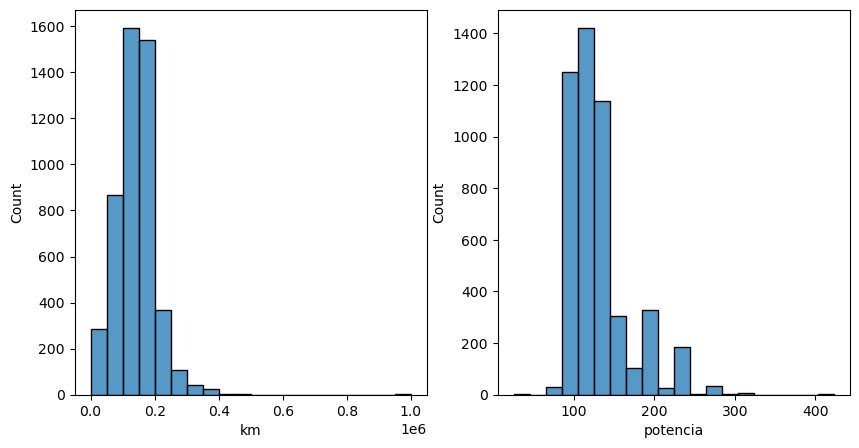

In [299]:
# Visualizamos su distribucion actual

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

sns.histplot(df['km'], ax=axs[0], bins=20)
sns.histplot(df['potencia'], ax=axs[1], bins=20)

In [300]:
# Separamos km y potencia en categorias

df['km_cat'] = pd.cut(df['km'], bins=[0, 70000, 160000, np.inf], labels=['poco usado', 'usado', 'muy usado'])
df['potencia_cat'] = pd.cut(df['potencia'], bins=[0, 100, 140, np.inf], labels=['potencia baja', 'potencia media', 'potencia alta'])

#### COLUMNAS CON POCOS NULOS

In [301]:
# Vamos a imputar la moda a los atributos con pocos nulos

for col in ['tipo_gasolina', 'volante_regulable', 'modelo', 'elevalunas_electrico', 'camara_trasera', 'fecha_venta_dayname', 'fecha_venta_month', 'fecha_venta_year']:

    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/2571470258.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/2571470258.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fi

#### IMPUTAR MODA
A partir de aqui, vamos a empezar a imputar los nulos agrupando por las columnas mas relevantes. Para ello hemos empaquetado los pasos de imputacion en la siguiente funcion:

In [302]:
# Esta funcion rellena valores nulos de una columna base en un df, imputando la moda calculada en distintos niveles de agrupación
# Ademas, la funcion monitorea lo que sucede en cada iteracion (num de nulos imputados, num de nulos restantes)

def imputar_df_agrupados(dataset, lista_listas_columnas, base_col):

    print('\n')
    print(f'Imputando columna {base_col}')
    total_nulos_inicio = dataset[base_col].isna().sum()
    print(f'Nulos totales antes de imputar: {total_nulos_inicio}')
    print('\n')

    lista_df = []
    lista_base_col = []

    for i, columns in enumerate(lista_listas_columnas):

        print(f'Agrupando por {columns}')
        print('\n')
        # Calculamos la moda por grupo

        df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()
        df_null.dropna(subset=base_col, inplace=True)
        nueva_col = f'{base_col}_{i+1}'
        df_null.rename(columns={base_col: nueva_col}, inplace=True)

        # Guardamos los df agrupados en lista_df

        lista_df.append(df_null)    

         # Mergeamos nuestro dataset con los df agrupados

        dataset = dataset.merge(lista_df[i], how='left', left_on=lista_listas_columnas[i], right_on=lista_listas_columnas[i])

        # Generamos la lista de nombres de los datasets agrupados para hacer el bfill()

        lista_base_col.append(base_col + f'_{i+1}')         

        nulos_antes = dataset[base_col].isna().sum()
        dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]    
        nulos_despues =  dataset[base_col].isna().sum()
        imputados = nulos_antes - nulos_despues

        print('\n')
        print(f'- Imputados en esta vuelta: {imputados}')
        print(f'- Nulos restantes: {nulos_despues}')
        print('\n')
    
    dataset.drop(columns=lista_base_col, inplace=True)  # borramos columnas

    return dataset

#### AIRE_ACONDICIONADO

In [303]:
lista_columnas = [
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable', 'tipo_coche'],    
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable'],
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth'],
    ['potencia_cat', 'km_cat', 'modelo', 'bluetooth'], 
    ['potencia_cat', 'km_cat', 'modelo'], 
    ['potencia_cat', 'km_cat']
]


df_no_nulos = imputar_df_agrupados(df, lista_columnas, 'aire_acondicionado')

/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




Imputando columna aire_acondicionado
Nulos totales antes de imputar: 485


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable', 'tipo_coche']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 240
- Nulos restantes: 245


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 132
- Nulos restantes: 113


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 13
- Nulos restantes: 100


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'bluetooth']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 12
- Nulos restantes: 88


Agrupando por ['potencia_cat', 'km_cat', 'modelo']




- Imputados en esta vuelta: 80
- Nulos restantes: 8


Agrupando por ['potencia_cat', 'km_cat']




- Imputados en esta vuelta: 8
- Nulos restantes: 0




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcastin

#### COLOR

In [304]:
lista_columnas = [
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable', 'tipo_coche'],    
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable'],
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth'],
    ['potencia_cat', 'km_cat', 'modelo', 'bluetooth'], 
    ['potencia_cat', 'km_cat', 'modelo'], 
    ['potencia_cat', 'km_cat']
]


df_no_nulos = imputar_df_agrupados(df_no_nulos, lista_columnas, 'color')

/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




Imputando columna color
Nulos totales antes de imputar: 444


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable', 'tipo_coche']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 240
- Nulos restantes: 204


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 116
- Nulos restantes: 88


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 8
- Nulos restantes: 80


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'bluetooth']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 7
- Nulos restantes: 73


Agrupando por ['potencia_cat', 'km_cat', 'modelo']




- Imputados en esta vuelta: 68
- Nulos restantes: 5


Agrupando por ['potencia_cat', 'km_cat']




- Imputados en esta vuelta: 5
- Nulos restantes: 0




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()


#### ALERTA_LIM_VELOCIDAD

In [305]:
lista_columnas = [
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable', 'tipo_coche'],    
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable'],
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth'],
    ['potencia_cat', 'km_cat', 'modelo', 'bluetooth'], 
    ['potencia_cat', 'km_cat', 'modelo'], 
    ['potencia_cat', 'km_cat']
]

df_no_nulos = imputar_df_agrupados(df_no_nulos, lista_columnas, 'alerta_lim_velocidad')

/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




Imputando columna alerta_lim_velocidad
Nulos totales antes de imputar: 727


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable', 'tipo_coche']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 380
- Nulos restantes: 347


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 192
- Nulos restantes: 155


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 13
- Nulos restantes: 142


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'bluetooth']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcastin



- Imputados en esta vuelta: 18
- Nulos restantes: 124


Agrupando por ['potencia_cat', 'km_cat', 'modelo']




- Imputados en esta vuelta: 120
- Nulos restantes: 4


Agrupando por ['potencia_cat', 'km_cat']




- Imputados en esta vuelta: 4
- Nulos restantes: 0




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]


#### BLUETOOTH

In [306]:
lista_columnas = [
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'aire_acondicionado', 'volante_regulable', 'tipo_coche'],    
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'aire_acondicionado', 'volante_regulable'],
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'aire_acondicionado'],
    ['potencia_cat', 'km_cat', 'modelo', 'aire_acondicionado'], 
    ['potencia_cat', 'km_cat', 'modelo'], 
    ['potencia_cat', 'km_cat']
]

df_no_nulos = imputar_df_agrupados(df_no_nulos, lista_columnas, 'bluetooth')



Imputando columna bluetooth
Nulos totales antes de imputar: 728


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'aire_acondicionado', 'volante_regulable', 'tipo_coche']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The defaul



- Imputados en esta vuelta: 454
- Nulos restantes: 274


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'aire_acondicionado', 'volante_regulable']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 242
- Nulos restantes: 32


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'aire_acondicionado']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 11
- Nulos restantes: 21


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'aire_acondicionado']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 10
- Nulos restantes: 11


Agrupando por ['potencia_cat', 'km_cat', 'modelo']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 6
- Nulos restantes: 5


Agrupando por ['potencia_cat', 'km_cat']




- Imputados en esta vuelta: 5
- Nulos restantes: 0




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]


#### TIPO_COCHE

In [307]:
lista_columnas = [    
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable'],
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth'],
    ['potencia_cat', 'km_cat', 'modelo', 'bluetooth'], 
    ['potencia_cat', 'km_cat', 'modelo'], 
    ['potencia_cat', 'km_cat']
]

df_no_nulos = imputar_df_agrupados(df_no_nulos, lista_columnas, 'tipo_coche')

/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




Imputando columna tipo_coche
Nulos totales antes de imputar: 1457


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 1359
- Nulos restantes: 98


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 42
- Nulos restantes: 56


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'bluetooth']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[base_col] = dataset[[base_col] + lista_base_col].bfill(axis=1).iloc[:,0]
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:39: FutureWarning: Downcastin



- Imputados en esta vuelta: 29
- Nulos restantes: 27


Agrupando por ['potencia_cat', 'km_cat', 'modelo']




- Imputados en esta vuelta: 15
- Nulos restantes: 12


Agrupando por ['potencia_cat', 'km_cat']




- Imputados en esta vuelta: 12
- Nulos restantes: 0




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()


#### FECHA_REGISTRO_YEAR

In [308]:
lista_columnas = [   
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable', 'aire_acondicionado', 'gps'], 
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable', 'aire_acondicionado'],
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable'],
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'aire_acondicionado'],
    ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth'],
    ['potencia_cat', 'km_cat', 'modelo', 'bluetooth', 'volante_regulable'],
    ['potencia_cat', 'km_cat', 'modelo', 'bluetooth', 'aire_acondicionado'], 
    ['potencia_cat', 'km_cat', 'bluetooth', 'camara_trasera'], 
    ['potencia_cat', 'km_cat', 'bluetooth'],
    ['potencia_cat', 'km_cat']
]

df_no_nulos = imputar_df_agrupados(df_no_nulos, lista_columnas, 'fecha_registro_year')



Imputando columna fecha_registro_year
Nulos totales antes de imputar: 2416


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable', 'aire_acondicionado', 'gps']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 2071
- Nulos restantes: 345


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable', 'aire_acondicionado']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 34
- Nulos restantes: 311


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'volante_regulable']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 77
- Nulos restantes: 234


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth', 'aire_acondicionado']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 77
- Nulos restantes: 157


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'camara_trasera', 'bluetooth']




- Imputados en esta vuelta: 1
- Nulos restantes: 156


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'bluetooth', 'volante_regulable']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()




- Imputados en esta vuelta: 67
- Nulos restantes: 89


Agrupando por ['potencia_cat', 'km_cat', 'modelo', 'bluetooth', 'aire_acondicionado']




- Imputados en esta vuelta: 7
- Nulos restantes: 82


Agrupando por ['potencia_cat', 'km_cat', 'bluetooth', 'camara_trasera']




- Imputados en esta vuelta: 82
- Nulos restantes: 0


Agrupando por ['potencia_cat', 'km_cat', 'bluetooth']




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()
/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/7236



- Imputados en esta vuelta: 0
- Nulos restantes: 0


Agrupando por ['potencia_cat', 'km_cat']




- Imputados en esta vuelta: 0
- Nulos restantes: 0




/var/folders/5q/5613h2ln67x9w409317t26dw0000gn/T/ipykernel_3671/723608819.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_null = dataset.groupby(columns)[base_col].agg(lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan).reset_index()


In [309]:
df_no_nulos.isna().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_registro_year     0
fecha_venta_dayname     0
fecha_venta_month       0
fecha_venta_year        0
km_cat                  0
potencia_cat            0
dtype: int64

## **4. TIPOS DE VARIABLES**
**********************************************************************************************************************************************************************************************

In [310]:
target = 'precio'

In [311]:
def obtener_lista_variables(dataset):

    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset.columns:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!=2 and (i not in target):
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b" or dataset[i].dtype.kind=="O") and len(dataset[i].unique())==2 and (i not in target):
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O") and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [312]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_no_nulos)

lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [313]:
# Transformamos las variables bool a integer

for i in lista_boolean:

    df_no_nulos[i] = df_no_nulos[i].astype(int)

## **5. FEATURE ENGINEERING**
**********************************************************************************************************************************************************************************************

In [314]:
corr = df_no_nulos.corr(numeric_only=True)

corr['precio'].sort_values(ascending=False)

precio                  1.000000
potencia                0.639460
alerta_lim_velocidad    0.439878
fecha_registro_year     0.361375
volante_regulable       0.268006
elevalunas_electrico    0.262943
camara_trasera          0.253274
aire_acondicionado      0.235666
bluetooth               0.196046
fecha_venta_year        0.013937
fecha_venta_month       0.013494
gps                    -0.006029
km                     -0.409178
Name: precio, dtype: float64

#### EDAD_COCHE

In [315]:
df_no_nulos['edad_coche'] = df_no_nulos['fecha_venta_year'] - df_no_nulos['fecha_registro_year']
df_no_nulos[['fecha_registro_year', 'fecha_venta_year', 'edad_coche']].head()

,fecha_registro_year,fecha_venta_year,edad_coche
0,2012.0,2018.0,6.0
1,2015.0,2018.0,3.0
2,2012.0,2018.0,6.0
3,2014.0,2018.0,4.0
4,2014.0,2018.0,4.0


In [316]:
# Eliminamos fecha_registro_year y fecha_venta_year

df_no_nulos.drop(columns=['fecha_registro_year', 'fecha_venta_year'], inplace=True)

In [317]:
# Eliminamos registros con edades negativas

df_no_nulos.drop(df_no_nulos[df_no_nulos['edad_coche'] < 0].index, axis=0, inplace=True)

#### COCHE_NUEVO

In [318]:
df_no_nulos['coche_nuevo'] = (df_no_nulos['edad_coche'] <= 1).astype(int)

df_no_nulos[df_no_nulos['coche_nuevo']==1]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_dayname,fecha_venta_month,km_cat,potencia_cat,edad_coche,coche_nuevo
139,330,122991.0,170.0,diesel,green,coupe,1,1,1,1,0,1,0,11300.0,Wednesday,8.0,usado,potencia alta,1.0,1
3579,530,10480.0,195.0,diesel,grey,sedan,1,1,1,0,1,1,1,51500.0,Saturday,9.0,poco usado,potencia alta,1.0,1
3673,116,6777.0,85.0,diesel,black,subcompact,0,1,0,0,0,1,0,11300.0,Thursday,3.0,poco usado,potencia baja,1.0,1
3925,X5,706.0,155.0,diesel,black,suv,1,1,0,1,1,1,1,41600.0,Thursday,2.0,poco usado,potencia alta,1.0,1
4254,X1,11429.0,85.0,diesel,black,suv,1,1,0,0,0,1,0,19800.0,Friday,6.0,poco usado,potencia baja,1.0,1


#### VENTA EN FIN DE SEMANA

In [319]:
df_no_nulos['venta_fin_semana'] = df_no_nulos['fecha_venta_dayname'].isin(['Saturday', 'Sunday']).astype(int)

# Eliminamos fecha_venta_dayname
df_no_nulos.drop(columns='fecha_venta_dayname', inplace=True)

df_no_nulos.head()


,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_month,km_cat,potencia_cat,edad_coche,coche_nuevo,venta_fin_semana
0,118,140411.0,100.0,diesel,black,hatchback,1,1,0,1,0,1,0,11300.0,1.0,usado,potencia baja,6.0,0,0
1,M4,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,2.0,poco usado,potencia alta,3.0,0,0
2,320,183297.0,120.0,diesel,white,estate,0,0,0,1,0,1,0,10200.0,2.0,muy usado,potencia media,6.0,0,0
3,420,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,0,25100.0,2.0,usado,potencia media,4.0,0,0
4,425,97097.0,160.0,diesel,silver,suv,1,1,0,0,1,1,1,33400.0,4.0,usado,potencia alta,4.0,0,1


#### ESTACIONALIDAD

In [320]:
def estacionalidad(mes):

    if mes in [12, 1, 2]:
        return 0    # invierno
    
    if mes in [3, 4, 5]:
        return 1    # primavera
    
    if mes in [6, 7, 8]:
        return 2    # verano
    
    else:
        return 3    # otono
    
df_no_nulos['estacion_venta'] = df_no_nulos['fecha_venta_month'].apply(estacionalidad)

# Eliminamos fecha_venta_month

df_no_nulos.drop(columns='fecha_venta_month', inplace=True)

df_no_nulos.head()


,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,km_cat,potencia_cat,edad_coche,coche_nuevo,venta_fin_semana,estacion_venta
0,118,140411.0,100.0,diesel,black,hatchback,1,1,0,1,0,1,0,11300.0,usado,potencia baja,6.0,0,0,0
1,M4,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,poco usado,potencia alta,3.0,0,0,0
2,320,183297.0,120.0,diesel,white,estate,0,0,0,1,0,1,0,10200.0,muy usado,potencia media,6.0,0,0,0
3,420,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,0,25100.0,usado,potencia media,4.0,0,0,0
4,425,97097.0,160.0,diesel,silver,suv,1,1,0,0,1,1,1,33400.0,usado,potencia alta,4.0,0,1,1


#### KM PER YEAR

In [321]:
df_no_nulos['km_per_year'] = (df_no_nulos['km'] / df_no_nulos['edad_coche']).round(0)

df_no_nulos[['km', 'edad_coche', 'km_per_year']]

,km,edad_coche,km_per_year
0,140411.0,6.0,23402.0
1,13929.0,3.0,4643.0
2,183297.0,6.0,30550.0
3,128035.0,4.0,32009.0
4,97097.0,4.0,24274.0
...,...,...,...
4827,39743.0,3.0,13248.0
4828,49832.0,3.0,16611.0
4829,19633.0,3.0,6544.0
4830,27920.0,2.0,13960.0


#### USO INTENSIVO

In [322]:
df_no_nulos['uso_intensivo'] = (df_no_nulos['km_per_year'] > 20000).astype(int)

df_no_nulos[['km_per_year', 'uso_intensivo']]

,km_per_year,uso_intensivo
0,23402.0,1
1,4643.0,0
2,30550.0,1
3,32009.0,1
4,24274.0,1
...,...,...
4827,13248.0,0
4828,16611.0,0
4829,6544.0,0
4830,13960.0,0


#### POTENCIA POR KM

In [323]:
df_no_nulos['potencia_por_km']=df_no_nulos['potencia']/df_no_nulos['km']

#### EQUIPAMIENTO PREMIUM

In [ ]:
df_no_nulos['premium'] = (
    df_no_nulos['camara_trasera'] + 
    df_no_nulos['gps'] + 
    df_no_nulos['bluetooth'] +
    df_no_nulos['aire_acondicionado'] + 
    df_no_nulos['volante_regulable'] +
    df_no_nulos['alerta_lim_velocidad'] +
    df_no_nulos['elevalunas_electrico']
) >= 5

df_no_nulos['premium'] = df_no_nulos['premium'].astype(int)

df_no_nulos[['camara_trasera', 'gps', 'aire_acondicionado', 'volante_regulable', 'alerta_lim_velocidad', 'elevalunas_electrico', 'premium']]


,camara_trasera,gps,aire_acondicionado,volante_regulable,alerta_lim_velocidad,elevalunas_electrico,premium
0,0,1,1,1,0,1,0
1,0,1,1,1,1,0,0
2,0,1,0,0,0,1,0
3,0,1,1,1,0,1,0
4,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...
4827,0,1,1,0,0,0,0
4828,0,1,1,0,1,0,0
4829,0,1,1,0,1,0,0
4830,0,1,1,1,1,0,0


#### COCHE TECNOLOGICO

In [325]:
df_no_nulos['tecnologico'] = ((df_no_nulos['gps'] == 1) & (df_no_nulos['bluetooth'] == 1)).astype(int)

df_no_nulos[['gps', 'bluetooth', 'tecnologico']]

,gps,bluetooth,tecnologico
0,1,0,0
1,1,1,1
2,1,0,0
3,1,1,1
4,1,1,1
...,...,...,...
4827,1,0,0
4828,1,0,0
4829,1,0,0
4830,1,0,0


#### COCHE POTENTE

In [326]:
df_no_nulos['potente'] = (df_no_nulos['potencia'] > 150).astype(int)

df_no_nulos[['potencia', 'potente']]

,potencia,potente
0,100.0,0
1,317.0,1
2,120.0,0
3,135.0,0
4,160.0,1
...,...,...
4827,110.0,0
4828,100.0,0
4829,110.0,0
4830,110.0,0


#### TIPO COLOR

In [327]:
df_no_nulos['color'].unique()

array(['black', 'grey', 'white', 'red', 'silver', 'blue', 'orange',
       'beige', 'brown', 'green'], dtype=object)

In [328]:
def tipo_color(color):

    if color == 'black':
        return 0    # negro
    
    if color == 'white':
        return 1    # blanco
    
    else:
        return 2    # de color
    

df_no_nulos['tipo_color'] = df_no_nulos['color'].apply(tipo_color)

df_no_nulos[['color', 'tipo_color']]

,color,tipo_color
0,black,0
1,grey,2
2,white,1
3,red,2
4,silver,2
...,...,...
4827,black,0
4828,grey,2
4829,grey,2
4830,brown,2


#### COLOR POPULAR

In [329]:
colores_populares = df_no_nulos['color'].value_counts().head(3).index.to_list()
colores_populares

['black', 'grey', 'blue']

In [330]:
df_no_nulos['color_popular'] = df_no_nulos['color'].isin(colores_populares).astype(int)

# Eliminamos color

df_no_nulos.drop(columns='color', inplace=True)

#### MODELO AGRUPADO
Agrupamos la columna modelo (76 valores distintos) por tipo de modelo (Serie 1, Serie 2, etc...). La intencion es introducir menos ruido al modelo


In [331]:
# Funcion para agrupar modelos

def agrupar_modelo(modelo):

    if pd.isna(modelo):
        return 'otros'
    
    modelo=str(modelo)  # nos aseguramos de que modelo es un string
    
    # 1. Modelos "M" (alto rendimiento)
    if modelo.startswith('M') or ' M' in modelo:
        return 'Serie M'
    # 2. Serie 1
    if any(m in modelo for m in ['114', '116', '118', '120', '123', '125', '135']):
        return 'Serie 1'
    # 3. Serie 2
    elif any(m in modelo for m in ['216', '218', '220', '225','214']):
        return 'Serie 2'
    # 4. Serie 3
    elif any(m in modelo for m in ['316', '318', '320', '323', '325', '328', '330', '335']):
        return 'Serie 3'
    # 5. Serie 4
    elif any(m in modelo for m in ['418', '420', '425', '430', '435', '440']):
        return 'Serie 4'
    # 6. Serie 5
    elif any(m in modelo for m in ['518', '520', '523', '525', '528', '530', '535', '540', 'ActiveHybrid 5']):
        return 'Serie 5'
    # 7. Serie 6
    elif any(m in modelo for m in ['630', '635', '640', '650']):
        return 'Serie 6'
    # 8. Serie 7
    elif any(m in modelo for m in ['730', '735', '740', '750']):
        return 'Serie 7'
    # 9. Serie i
    elif any(m in modelo for m in ['i3', 'i8']):
        return 'Serie i'
    # 10. Serie X
    elif any(m in modelo for m in ['X1', 'X3', 'X4', 'X5', 'X6']):
        return 'Serie X'
    # 11. Serie Z
    elif 'Z4' in modelo:
        return 'Serie Z'
    else:
        return 'otros'
    
df_no_nulos['modelo_agrupado'] = df_no_nulos['modelo'].apply(agrupar_modelo)

df_no_nulos[['modelo', 'modelo_agrupado', 'precio']].head()

,modelo,modelo_agrupado,precio
0,118,Serie 1,11300.0
1,M4,Serie M,69700.0
2,320,Serie 3,10200.0
3,420,Serie 4,25100.0
4,425,Serie 4,33400.0


In [332]:
# La precio medio varia bastante entre grupos

df_no_nulos[['modelo_agrupado', 'precio']].groupby('modelo_agrupado').mean()

,precio
modelo_agrupado,
Serie 1,9983.303730
Serie 2,16726.530612
Serie 3,12145.373467
Serie 4,25118.627451
Serie 5,16774.934037
Serie 6,32933.333333
Serie 7,28575.925926
Serie M,39846.296296
Serie X,20896.799224


In [333]:
# Eliminamos modelo 

df_no_nulos.drop(columns='modelo', inplace=True)

In [334]:
# Comprobamos correlaciones

corr = df_no_nulos.corr(numeric_only=True)

corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche,coche_nuevo,venta_fin_semana,estacion_venta,km_per_year,uso_intensivo,potencia_por_km,premium,tecnologico,potente,tipo_color,color_popular
km,1.000000,-0.050012,0.067433,0.015023,0.002764,0.045505,-0.029186,0.154585,-0.040661,-0.408980,0.448965,-0.059150,0.007467,0.000206,0.655375,0.470157,-0.180772,0.005655,-0.027198,-0.037697,-0.010161,0.053723
potencia,-0.050012,1.000000,0.327204,0.191914,0.313753,0.340448,0.234485,0.006202,0.502216,0.639588,-0.075959,0.007452,-0.003445,-0.041422,0.002427,-0.003469,0.117759,0.482238,0.231038,0.813314,-0.030718,0.026402
volante_regulable,0.067433,0.327204,1.000000,0.306076,0.253436,0.277482,0.137466,0.244071,0.226427,0.268006,0.071285,0.016160,-0.004025,0.067009,0.004806,0.008456,0.043738,0.533196,0.137221,0.275859,0.028473,0.074108
aire_acondicionado,0.015023,0.191914,0.306076,1.000000,0.144760,0.267158,0.117786,0.352643,0.213937,0.235938,-0.214107,0.015947,-0.017706,-0.000846,0.182730,0.158706,0.018604,0.311349,0.115077,0.156524,-0.001260,0.051661
camara_trasera,0.002764,0.313753,0.253436,0.144760,1.000000,0.197585,0.162678,0.061652,0.205180,0.253125,0.054241,0.015953,-0.008702,0.003450,-0.050108,-0.036994,0.015830,0.500635,0.159165,0.281824,0.000957,0.013337
elevalunas_electrico,0.045505,0.340448,0.277482,0.267158,0.197585,1.000000,0.238383,0.203056,0.328930,0.263044,-0.054720,-0.003891,-0.005328,-0.032756,0.106096,0.070831,-0.008736,0.579504,0.240427,0.258115,-0.081329,0.035941
bluetooth,-0.029186,0.234485,0.137466,0.117786,0.162678,0.238383,1.000000,0.117821,0.094836,0.195872,-0.036861,0.013932,-0.003959,-0.010993,0.020205,0.050992,0.031836,0.199169,0.992166,0.175257,-0.046077,-0.014174
gps,0.154585,0.006202,0.244071,0.352643,0.061652,0.203056,0.117821,1.000000,-0.063564,-0.005914,0.076030,0.008693,0.002588,0.056132,0.100142,0.099667,-0.013196,0.173513,0.142503,0.041161,-0.003450,0.083866
alerta_lim_velocidad,-0.040661,0.502216,0.226427,0.213937,0.205180,0.328930,0.094836,-0.063564,1.000000,0.439682,-0.124514,-0.009125,-0.016529,-0.047239,0.066083,0.038382,0.055958,0.532345,0.093278,0.392549,-0.036123,0.013593
precio,-0.408980,0.639588,0.268006,0.235938,0.253125,0.263044,0.195872,-0.005914,0.439682,1.000000,-0.361398,0.039518,-0.008560,-0.000298,-0.149785,-0.110830,0.205928,0.408721,0.192168,0.518778,-0.039077,-0.013036


In [335]:
# bluetooth esta muy correlacionado con tecnologico, la borramos

df_no_nulos.drop(columns='bluetooth', inplace=True)

In [336]:
# Eliminamos km_cat y potencia_cat, ya no las necesitamos

df_no_nulos.drop(columns=['km_cat', 'potencia_cat'], inplace=True)

In [337]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_no_nulos)

print(f'{len(lista_numericas)}/{len(df_no_nulos.columns)-1} Variables numericas:\n\n {lista_numericas}\n\n')
print(f'{len(lista_boolean)}/{len(df_no_nulos.columns)-1} Variables booleanas:\n\n {lista_boolean}\n\n')
print(f'{len(lista_categoricas)}/{len(df_no_nulos.columns)-1} Variables categoricas:\n\n {lista_categoricas}\n\n')

7/23 Variables numericas:

 ['km', 'potencia', 'edad_coche', 'estacion_venta', 'km_per_year', 'potencia_por_km', 'tipo_color']


13/23 Variables booleanas:

 ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'gps', 'alerta_lim_velocidad', 'coche_nuevo', 'venta_fin_semana', 'uso_intensivo', 'premium', 'tecnologico', 'potente', 'color_popular']


3/23 Variables categoricas:

 ['tipo_gasolina', 'tipo_coche', 'modelo_agrupado']




## **6. ANALISIS DE VARIABLES**
**********************************************************************************************************************************************************************************************

In [338]:
df_no_nulos_no_outliers = df_no_nulos.copy()

#### TARGET

<Axes: xlabel='precio'>

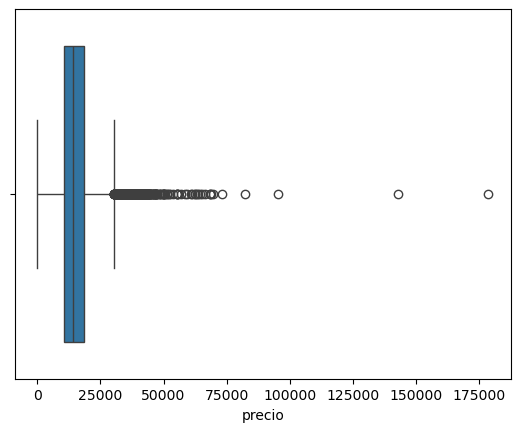

In [339]:
sns.boxplot(x=df_no_nulos_no_outliers['precio'])

In [340]:
# No hay valores negativos o iguales a 0

df_no_nulos_no_outliers[df_no_nulos_no_outliers['precio']<=0]

,km,potencia,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,gps,alerta_lim_velocidad,...,estacion_venta,km_per_year,uso_intensivo,potencia_por_km,premium,tecnologico,potente,tipo_color,color_popular,modelo_agrupado


#### OUTLIERS DEL TARGET

In [341]:
Q1 = df_no_nulos_no_outliers['precio'].quantile(0.1) # 7000.0
Q3 = df_no_nulos_no_outliers['precio'].quantile(0.9) # 21900.0
IQR = Q3 - Q1

indexes_high = df_no_nulos_no_outliers['precio'][df_no_nulos_no_outliers['precio'] > (Q3 + 1.5*IQR)].index
indexes_low = df_no_nulos_no_outliers['precio'][df_no_nulos_no_outliers['precio'] < (Q1 - 1.5*IQR)].index

max_precio = df_no_nulos_no_outliers[df_no_nulos_no_outliers['precio'] < (Q3 + 1.5*IQR)]['precio'].max()

df_no_nulos_no_outliers.loc[indexes_high, 'precio'] = max_precio

<Axes: xlabel='precio'>

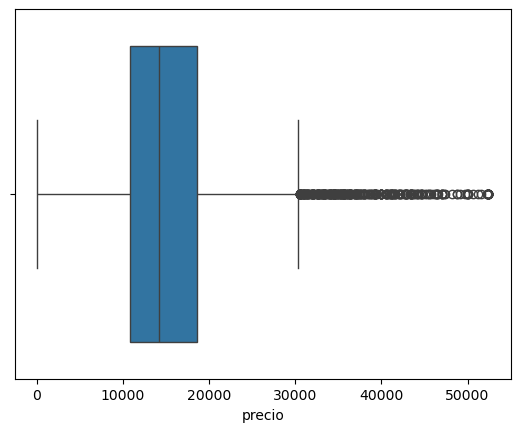

In [342]:
sns.boxplot(x=df_no_nulos_no_outliers['precio'])

Vamos a crear las columnas LOG_precio y SQRT_precio para visualizar su distribucion junto a precio

In [343]:
df_no_nulos_no_outliers['LOG_precio'] = np.log10(df_no_nulos_no_outliers['precio'])
df_no_nulos_no_outliers['SQRT_precio'] = np.sqrt(df_no_nulos_no_outliers['precio'])

target = ['precio', 'LOG_precio', 'SQRT_precio']

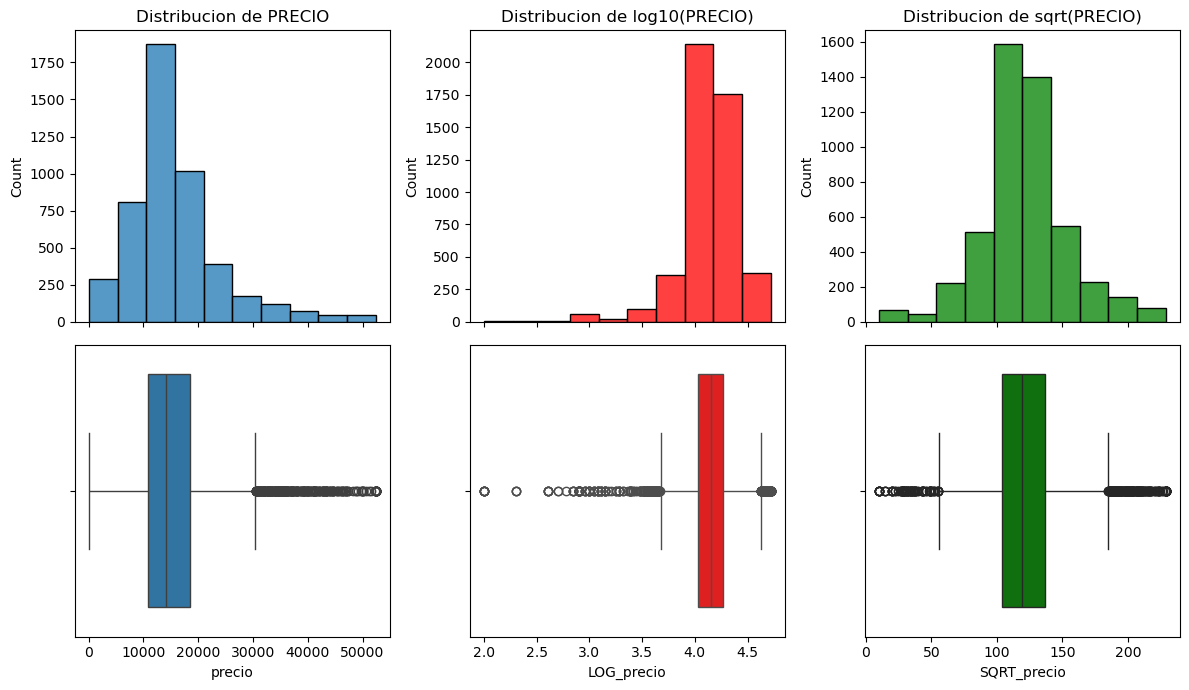

In [344]:
# Visualizamos precio, LOG_precio, y SQRT_precio

fig, axs = plt.subplots(ncols=3, nrows=2, sharex='col', figsize=(12,7))

ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[0][2]
ax4 = axs[1][0]
ax5 = axs[1][1]
ax6 = axs[1][2]

# Histogramas
sns.histplot(df_no_nulos_no_outliers['precio'], bins=10, ax=ax1)
ax1.set_title('Distribucion de PRECIO')

sns.histplot(np.log10(df_no_nulos_no_outliers['precio']),bins=10, ax=ax2, color='red')
ax2.set_title('Distribucion de log10(PRECIO)')

sns.histplot(np.sqrt(df_no_nulos_no_outliers['precio']), bins=10, ax=ax3, color='green')
ax3.set_title('Distribucion de sqrt(PRECIO)')

# Boxplots
sns.boxplot(x=df_no_nulos_no_outliers['precio'], ax=ax4)

sns.boxplot(x=df_no_nulos_no_outliers['LOG_precio'], ax=ax5, color='red')

sns.boxplot(x=df_no_nulos_no_outliers['SQRT_precio'], ax=ax6, color='green')

plt.tight_layout()

SQRT_precio muestra la mejor distribucion gaussiana. La usaremos como target y borraremos precio y LOG_precio

In [345]:
df_no_nulos_no_outliers.drop(columns=['precio', 'LOG_precio'], inplace=True)

#### VARIABLES CATEGORICAS

In [346]:
for col in lista_categoricas:

    print((df_no_nulos_no_outliers[col].value_counts(normalize=True)*100).reset_index())
    print()
    print()

   tipo_gasolina  proportion
0         diesel   95.712510
1         petrol    3.956089
2  hybrid_petrol    0.165700
3         Diesel    0.103563
4        electro    0.062138


    tipo_coche  proportion
0       estate   36.868268
1          suv   22.058824
2        sedan   20.671085
3    hatchback   15.078708
4        coupe    1.926263
5   subcompact    1.677713
6  convertible    0.911350
7          van    0.807788


   modelo_agrupado  proportion
0          Serie 3   37.158244
1          Serie 5   23.550124
2          Serie X   21.354598
3          Serie 1   11.661143
4          Serie 4    2.112676
5          Serie M    1.118476
6          Serie 7    1.118476
7          Serie 2    1.014913
8          Serie 6    0.621375
9          Serie i    0.144988
10         Serie Z    0.124275
11           otros    0.020713




In [347]:
# Vamos a borrar tipo_gasolina ya que la gran mayoria de registros son diesel, no aporta valor

df_no_nulos_no_outliers.drop(columns='tipo_gasolina', inplace=True)

In [348]:
# Funcion para eliminar valores por debajo de un threshold

def eliminar_valores(dataset, lista_columnas, threshold_ratio):

    indexes_a_eliminar = set()

    for col in lista_columnas:

        df_valores = (dataset[col].value_counts(normalize=True)*100).reset_index()
        valores_a_eliminar = df_valores[df_valores['proportion'] < threshold_ratio].iloc[:,0].to_list()
        print(f'Columna: {col}')
        print(f'Valores eliminados: {valores_a_eliminar}')
        print()
        indexes_col = dataset[dataset[col].isin(valores_a_eliminar)].index
        indexes_a_eliminar.update(indexes_col)

    dataset.drop(indexes_a_eliminar, axis=0, inplace=True)

In [349]:
# Borramos registros para valores categoricos por debajo del 1%

lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_no_nulos_no_outliers)

eliminar_valores(df_no_nulos_no_outliers, lista_categoricas, 1)

Columna: tipo_coche
Valores eliminados: ['convertible', 'van']

Columna: modelo_agrupado
Valores eliminados: ['Serie 6', 'Serie i', 'Serie Z', 'otros']



#### VARIABLES NUMERICAS

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
[[<Axes: title={'center': 'edad_coche'}>]]
[[<Axes: title={'center': 'estacion_venta'}>]]
[[<Axes: title={'center': 'km_per_year'}>]]
[[<Axes: title={'center': 'potencia_por_km'}>]]
[[<Axes: title={'center': 'tipo_color'}>]]


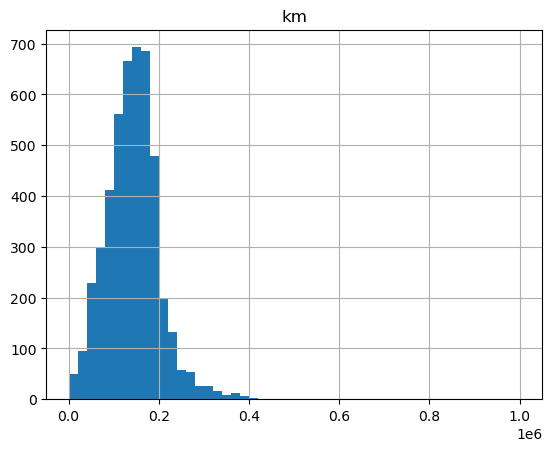

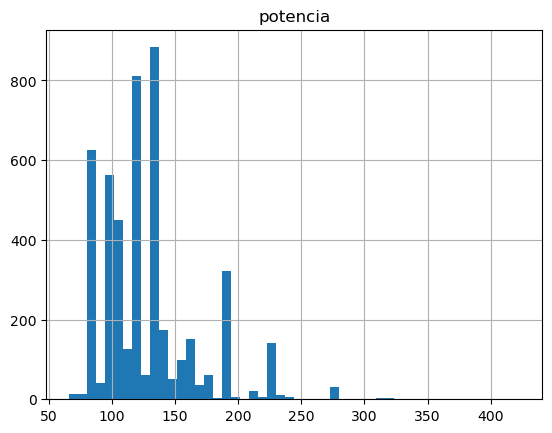

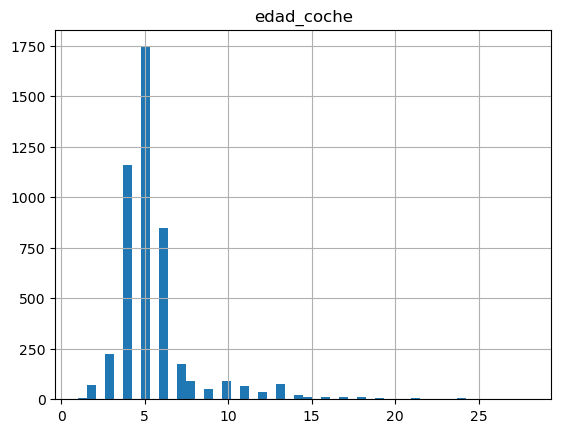

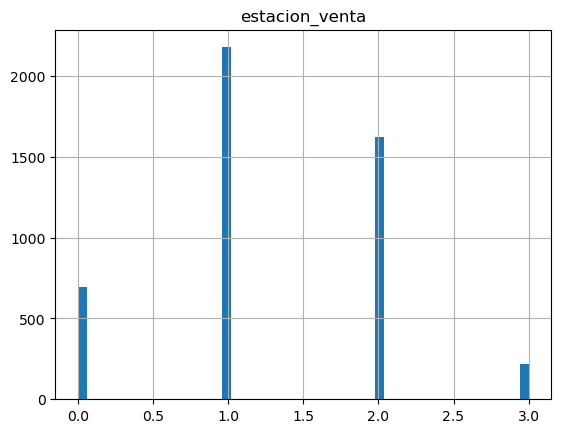

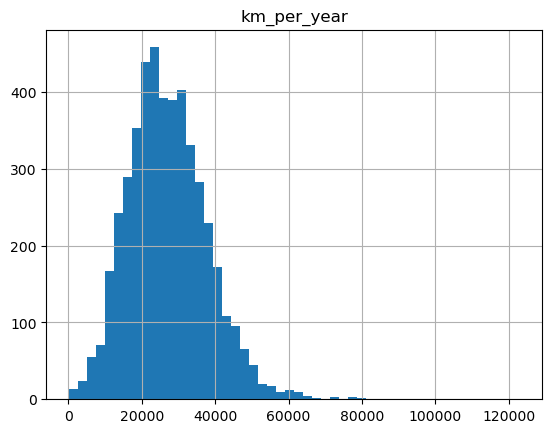

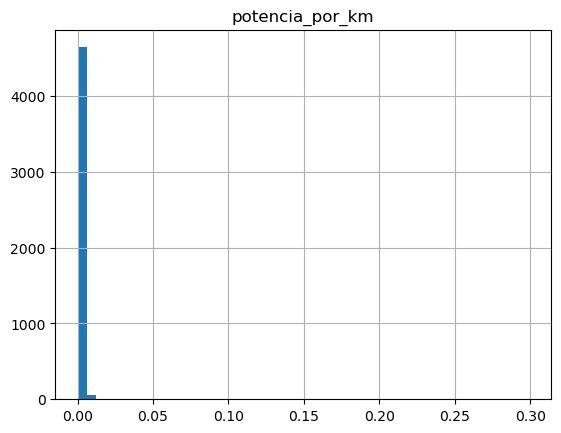

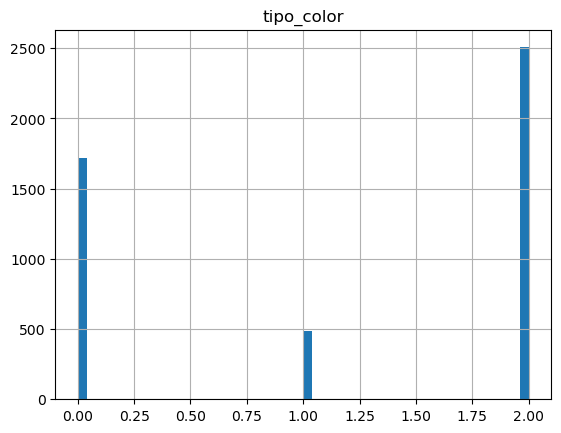

In [350]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_no_nulos_no_outliers)

for i in lista_numericas:

    print(df_no_nulos_no_outliers.hist(i, bins=50))

Observamos outliers en potencia, edad_coche, km_per_year. Vamos a crear una funcion para corregirlos

In [351]:
def corregir_outliers(dataset, base_col, quantile_low, quantile_high):
    
    Q1 = dataset[base_col].quantile(quantile_low)
    Q3 = dataset[base_col].quantile(quantile_high)
    IQR = Q3 - Q1

    indexes_high = dataset[base_col][dataset[base_col] > (Q3 + 1.5*IQR)].index
    indexes_low = dataset[base_col][dataset[base_col] < (Q1 - 1.5*IQR)].index

    max_precio = dataset[dataset[base_col] < (Q3 + 1.5*IQR)][base_col].max()
    min_precio = dataset[base_col][dataset[base_col] > (Q1 - 1.5*IQR)].min()

    dataset.loc[indexes_high, base_col] = max_precio
    dataset.loc[indexes_low, base_col] = min_precio


    return (sns.boxplot(x=dataset[base_col]),
            plt.title(f'Distribucion de {base_col} sin outliers', pad=15))

OUTLIERS POTENCIA

<Axes: xlabel='potencia'>

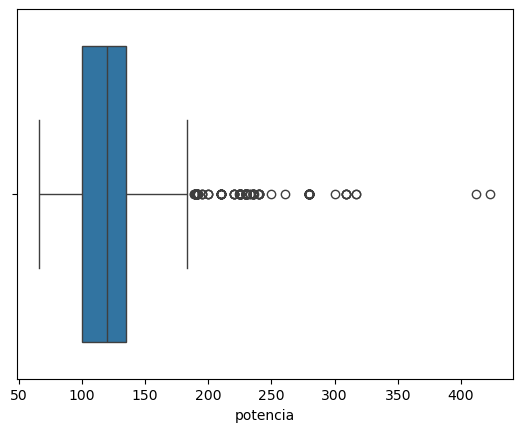

In [352]:
# Boxplot con outliers

sns.boxplot(x=df_no_nulos_no_outliers['potencia'])

(<Axes: title={'center': 'Distribucion de potencia sin outliers'}, xlabel='potencia'>,
 Text(0.5, 1.0, 'Distribucion de potencia sin outliers'))

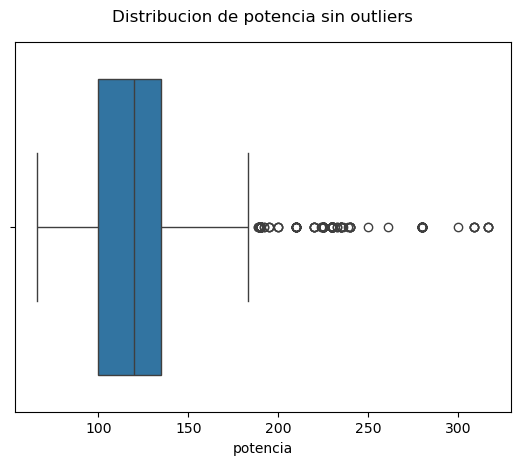

In [353]:
# Boxplot sin outliers

corregir_outliers(df_no_nulos_no_outliers, 'potencia', 0.1, 0.9)

OUTLIERS EDAD_COCHE

<Axes: xlabel='edad_coche'>

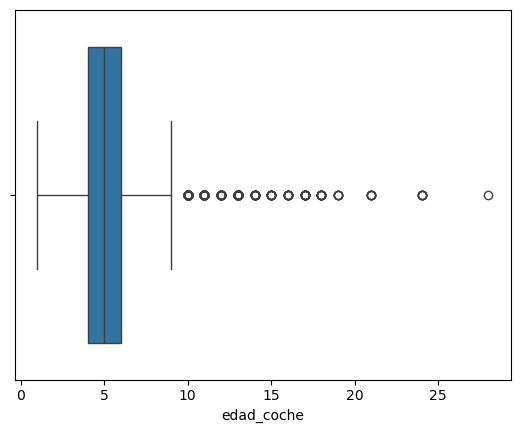

In [354]:
# Boxplot con outliers

sns.boxplot(x=df_no_nulos_no_outliers['edad_coche'])

(<Axes: title={'center': 'Distribucion de edad_coche sin outliers'}, xlabel='edad_coche'>,
 Text(0.5, 1.0, 'Distribucion de edad_coche sin outliers'))

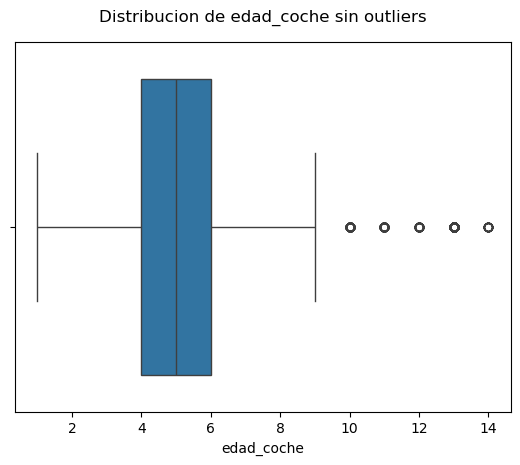

In [355]:
# Boxplot sin outliers

corregir_outliers(df_no_nulos_no_outliers, 'edad_coche', 0.1, 0.9)

OUTLIERS KM_PER_YEAR

<Axes: xlabel='km_per_year'>

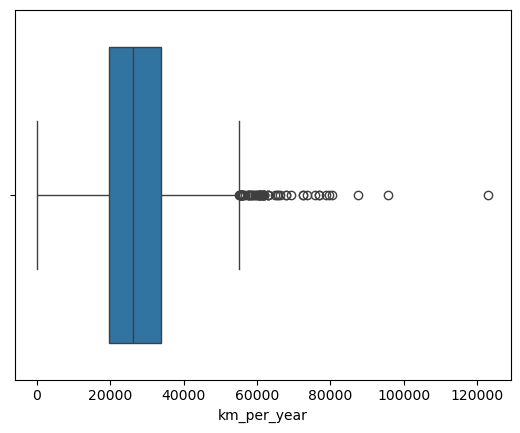

In [356]:
# Boxplot con outliers

sns.boxplot(x=df_no_nulos_no_outliers['km_per_year'])

(<Axes: title={'center': 'Distribucion de km_per_year sin outliers'}, xlabel='km_per_year'>,
 Text(0.5, 1.0, 'Distribucion de km_per_year sin outliers'))

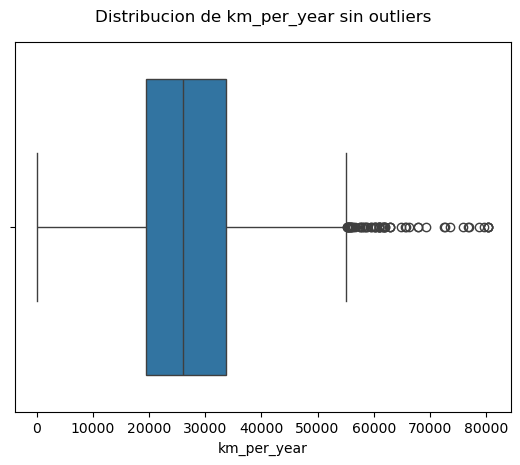

In [357]:
# Boxplot sin outliers

corregir_outliers(df_no_nulos_no_outliers, 'km_per_year', 0.1, 0.9)

## **7. PROCESAMIENTO DE VARIABLES**
**********************************************************************************************************************************************************************************************

In [358]:
df_no_nulos_no_outliers_escalado = df_no_nulos_no_outliers.copy()

In [359]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_no_nulos_no_outliers_escalado)

print(f'{len(lista_numericas)}/{len(df_no_nulos_no_outliers_escalado.columns)-1} Variables numericas:\n\n {lista_numericas}\n\n')
print(f'{len(lista_boolean)}/{len(df_no_nulos_no_outliers_escalado.columns)-1} Variables booleanas:\n\n {lista_boolean}\n\n')
print(f'{len(lista_categoricas)}/{len(df_no_nulos_no_outliers_escalado.columns)-1} Variables categoricas:\n\n {lista_categoricas}\n\n')

7/22 Variables numericas:

 ['km', 'potencia', 'edad_coche', 'estacion_venta', 'km_per_year', 'potencia_por_km', 'tipo_color']


13/22 Variables booleanas:

 ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'gps', 'alerta_lim_velocidad', 'coche_nuevo', 'venta_fin_semana', 'uso_intensivo', 'premium', 'tecnologico', 'potente', 'color_popular']


2/22 Variables categoricas:

 ['tipo_coche', 'modelo_agrupado']




#### VARIABLES NUMERICAS

Escalamos todas las variables numericas con MinMaxScaler

In [360]:
escala = MinMaxScaler(feature_range=(0,1))

df_no_nulos_no_outliers_escalado[lista_numericas] = escala.fit_transform(df_no_nulos_no_outliers_escalado[lista_numericas])

In [361]:
df_no_nulos_no_outliers_escalado[lista_numericas].head()

,km,potencia,edad_coche,estacion_venta,km_per_year,potencia_por_km,tipo_color
0,0.139949,0.135458,0.384615,0.000000,0.289759,0.002082,0.0
2,0.182839,0.215139,0.384615,0.000000,0.378869,0.001889,0.5
4,0.096631,0.374502,0.230769,0.333333,0.300630,0.005211,1.0
5,0.151891,0.633466,0.461538,0.000000,0.269351,0.004639,0.0
11,0.227547,0.314741,0.615385,0.333333,0.313832,0.001827,0.0


#### VARIABLES CATEGORICAS
Usamos OneHotEncoder para convertir las variables categoricas a variables numericas

In [362]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_no_nulos_no_outliers_escalado)

#encoder
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(df_no_nulos_no_outliers_escalado[lista_categoricas])

# creamos dataframe con data_encoded y lo mergeamos con nuestro df
df_encoded = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out())
df_no_nulos_no_outliers_escalado = df_no_nulos_no_outliers_escalado.merge(df_encoded, left_index=True, right_index=True)
df_no_nulos_no_outliers_escalado

# Eliminamos cols categoricas
df_no_nulos_no_outliers_escalado.drop(columns=lista_categoricas, inplace=True)


In [363]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_no_nulos_no_outliers_escalado)


In [370]:
corr = df_no_nulos_no_outliers_escalado.corr(numeric_only=True)

corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,gps,alerta_lim_velocidad,edad_coche,coche_nuevo,venta_fin_semana,estacion_venta,km_per_year,uso_intensivo,potencia_por_km,premium,tecnologico,potente,tipo_color,color_popular,SQRT_precio,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,modelo_agrupado_Serie 1,modelo_agrupado_Serie 2,modelo_agrupado_Serie 3,modelo_agrupado_Serie 4,modelo_agrupado_Serie 5,modelo_agrupado_Serie 7,modelo_agrupado_Serie M,modelo_agrupado_Serie X
km,1.000000,-0.044927,0.071695,0.019359,0.006042,0.038983,0.155508,-0.042601,0.462494,-0.061634,0.010033,0.005996,0.659130,0.462768,-0.171813,0.004155,-0.027148,-0.037550,-0.008991,0.048976,-0.453078,-0.038910,0.142101,-0.081474,0.030783,0.027742,-0.124205,-0.027408,-0.004333,0.089581,-0.063088,0.056768,0.011533,-0.006678,-0.124542
potencia,-0.044927,1.000000,0.320189,0.197776,0.303698,0.348379,0.000463,0.508654,-0.065437,0.008714,-0.008951,-0.061943,0.006782,-0.006521,0.099767,0.482475,0.225394,0.810782,-0.037539,0.032556,0.628794,0.063182,-0.012220,-0.220807,0.012544,-0.044758,0.189863,-0.168935,0.006975,-0.073143,-0.004422,0.023084,-0.013524,0.011828,0.194030
volante_regulable,0.071695,0.320189,1.000000,0.313858,0.251628,0.279345,0.247356,0.228021,0.078043,0.016866,-0.005921,0.061028,0.014200,0.013117,0.040700,0.532803,0.126981,0.265200,0.027386,0.077303,0.281726,0.000575,0.007231,-0.127418,0.030492,-0.006999,0.072722,-0.079861,0.006242,-0.030107,-0.034300,0.033009,0.002384,0.001742,0.071565
aire_acondicionado,0.019359,0.197776,0.313858,1.000000,0.146006,0.267276,0.357106,0.210735,-0.188412,0.016296,-0.024472,-0.001011,0.187697,0.160845,0.017293,0.310826,0.120294,0.155573,-0.003410,0.050121,0.302984,-0.049960,0.099978,-0.081221,0.037694,-0.016713,-0.066207,-0.062950,0.012620,0.037110,-0.042134,0.075075,0.013373,0.006848,-0.065556
camara_trasera,0.006042,0.303698,0.251628,0.146006,1.000000,0.198625,0.067374,0.201578,0.073887,0.016750,-0.013939,-0.009231,-0.051027,-0.039953,0.015442,0.497693,0.151133,0.270274,-0.002515,0.015424,0.238176,-0.018824,-0.016439,-0.050739,-0.022017,0.004212,0.086531,-0.023123,-0.012629,-0.046476,-0.011717,-0.009583,-0.028596,-0.001484,0.093968
elevalunas_electrico,0.038983,0.348379,0.279345,0.267276,0.198625,1.000000,0.198654,0.330981,-0.049963,-0.004010,-0.005868,-0.037322,0.102348,0.063115,-0.005503,0.578785,0.244148,0.257865,-0.083734,0.033156,0.336506,0.039534,0.057553,-0.108125,0.022256,-0.024209,0.002820,-0.092173,0.027555,0.022515,0.004316,0.030544,0.012589,0.005810,0.006114
gps,0.155508,0.000463,0.247356,0.357106,0.067374,0.198654,1.000000,-0.065717,0.089360,0.008798,0.008766,0.060887,0.100001,0.099821,-0.006916,0.170426,0.139388,0.039582,-0.007532,0.085431,0.018894,-0.029166,0.048762,0.011779,0.028621,0.035708,-0.098636,0.022710,0.006814,0.030229,-0.024229,0.053089,-0.011235,-0.016069,-0.094267
alerta_lim_velocidad,-0.042601,0.508654,0.228021,0.210735,0.201578,0.330981,-0.065717,1.000000,-0.119282,-0.009085,-0.019687,-0.055572,0.065338,0.033223,0.054553,0.532559,0.092810,0.386023,-0.037111,0.012147,0.475788,-0.011810,0.030580,-0.185446,0.021744,-0.044803,0.118334,-0.170096,-0.010441,0.000415,-0.032554,0.016617,-0.008220,0.037729,0.117470
edad_coche,0.462494,-0.065437,0.078043,-0.188412,0.073887,-0.049963,0.089360,-0.119282,1.000000,-0.068961,0.003476,0.029506,-0.287390,-0.256553,-0.097918,-0.015046,-0.045131,-0.005671,0.015287,0.049514,-0.443932,-0.011125,0.012326,-0.057207,0.016681,0.026801,0.012506,-0.021425,0.002454,0.005376,-0.036747,0.009526,-0.001824,-0.009822,0.013915
coche_nuevo,-0.061634,0.008714,0.016866,0.016296,0.016750,-0.004010,0.008798,-0.009085,-0.068961,1.000000,-0.006951,0.014377,-0.015684,-0.039796,0.235493,0.022159,0.014966,0.034813,-0.012982,0.003802,0.037926,-0.003148,-0.012180,0.004427,-0.017061,-0.004390,0.028923,0.008360,-0.000838,-0.012100,-0.004047,-0.018675,-0.003574,-0.003332,0.029866


In [373]:
corr['SQRT_precio'].sort_values(ascending=False)

SQRT_precio                1.000000
potencia                   0.628794
potente                    0.495955
alerta_lim_velocidad       0.475788
premium                    0.440072
elevalunas_electrico       0.336506
aire_acondicionado         0.302984
volante_regulable          0.281726
modelo_agrupado_Serie X    0.280859
tipo_coche_suv             0.280594
camara_trasera             0.238176
tecnologico                0.210141
potencia_por_km            0.164250
tipo_coche_coupe           0.053409
modelo_agrupado_Serie M    0.040600
coche_nuevo                0.037926
tipo_coche_sedan           0.019416
gps                        0.018894
modelo_agrupado_Serie 2    0.016861
modelo_agrupado_Serie 4    0.009610
modelo_agrupado_Serie 7    0.000665
venta_fin_semana          -0.016793
color_popular             -0.017081
estacion_venta            -0.028040
tipo_coche_subcompact     -0.036911
modelo_agrupado_Serie 5   -0.050545
tipo_color                -0.055526
uso_intensivo             -0

## **8. BONUS TRACK: MODELO**

In [364]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [365]:
X = df_no_nulos_no_outliers_escalado.drop(columns='SQRT_precio')
y = df_no_nulos_no_outliers_escalado['SQRT_precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [366]:
# Competicion de modelos

modelos = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Arbol de Decision', DecisionTreeRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    score = modelo.score(X_test, y_test)
    print(f'{nombre}: {score}')

Random Forest: 0.764705367098585
Arbol de Decision: 0.5511278186136083
XGBoost: 0.7503360478453098


In [367]:
df_no_nulos_no_outliers_escalado.columns

Index(['km', 'potencia', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'elevalunas_electrico', 'gps', 'alerta_lim_velocidad',
       'edad_coche', 'coche_nuevo', 'venta_fin_semana', 'estacion_venta',
       'km_per_year', 'uso_intensivo', 'potencia_por_km', 'premium',
       'tecnologico', 'potente', 'tipo_color', 'color_popular', 'SQRT_precio',
       'tipo_coche_coupe', 'tipo_coche_estate', 'tipo_coche_hatchback',
       'tipo_coche_sedan', 'tipo_coche_subcompact', 'tipo_coche_suv',
       'modelo_agrupado_Serie 1', 'modelo_agrupado_Serie 2',
       'modelo_agrupado_Serie 3', 'modelo_agrupado_Serie 4',
       'modelo_agrupado_Serie 5', 'modelo_agrupado_Serie 7',
       'modelo_agrupado_Serie M', 'modelo_agrupado_Serie X'],
      dtype='object')

In [368]:
# Eliminamos columnas
# df_no_nulos_no_outliers_escalado.drop(columns=['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'gps', 'km_per_year', 'elevalunas_electrico', 'alerta_lim_velocidad'], inplace=True)
# 
# # Nuevos X e y
# X = df_no_nulos_no_outliers_escalado.drop(columns='SQRT_precio')
# y = df_no_nulos_no_outliers_escalado['SQRT_precio']
# 
# # Segmentamos datos
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
# 
# # Competicion de modelos
# 
# modelos = [
#     ('Random Forest', RandomForestRegressor()),
#     ('Arbol de Decision', DecisionTreeRegressor()),
#     ('Regresion Lineal', LinearRegression())
# ]
# 
# for nombre, modelo in modelos:
#     modelo.fit(X_train, y_train)
#     score = modelo.score(X_test, y_test)
#     print(f'{nombre}: {score}')


In [369]:
df_no_nulos_no_outliers_escalado.columns

Index(['km', 'potencia', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'elevalunas_electrico', 'gps', 'alerta_lim_velocidad',
       'edad_coche', 'coche_nuevo', 'venta_fin_semana', 'estacion_venta',
       'km_per_year', 'uso_intensivo', 'potencia_por_km', 'premium',
       'tecnologico', 'potente', 'tipo_color', 'color_popular', 'SQRT_precio',
       'tipo_coche_coupe', 'tipo_coche_estate', 'tipo_coche_hatchback',
       'tipo_coche_sedan', 'tipo_coche_subcompact', 'tipo_coche_suv',
       'modelo_agrupado_Serie 1', 'modelo_agrupado_Serie 2',
       'modelo_agrupado_Serie 3', 'modelo_agrupado_Serie 4',
       'modelo_agrupado_Serie 5', 'modelo_agrupado_Serie 7',
       'modelo_agrupado_Serie M', 'modelo_agrupado_Serie X'],
      dtype='object')